In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import skew, kurtosis

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [2]:
tmp_df = pd.read_csv('성형외과제거_및_버스수정_행정동_변환_1101.csv')
pd.set_option('display.max_columns',35)
# tmp_df
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [3]:
tmp_df.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM',
       'POLICE_NUM', 'PHARM_NUM', 'NOISE_VIBRATION_NUM', 'MID_SCH_NUM',
       'MC_NUM', 'LEISURE_NUM', 'KINDER_NUM', 'KIDS_NUM', 'HIGH_SCH_NUM',
       'GYM_NUM', 'GOLF_NUM', 'FIRE_NUM', 'ELE_SCH_NUM', 'DPTM_NUM', 'CON_NUM',
       'CHILD_MED_NUM', 'CCTV_NUM', 'CAR_SHR_NUM', 'CAFE_NUM', 'BIKE_NUM',
       'ANI_HSPT_NUM', 'ACADEMY_NUM', 'HOSPITAL_NUM', 'GU', 'DONG',
       'DONG_CODE', 'BUS_CNT'],
      dtype='object')

In [4]:
tmp_df = tmp_df[['GU','DONG','DONG_CODE','SUBWAY_NUM','STARBUCKS_NUM','SPORT_NUM','SAFE_DLVR_NUM','POLICE_NUM','PHARM_NUM','NOISE_VIBRATION_NUM','MID_SCH_NUM','MC_NUM','LEISURE_NUM','KINDER_NUM','KIDS_NUM','HOSPITAL_NUM','HIGH_SCH_NUM','GYM_NUM','GOLF_NUM','FIRE_NUM','ELE_SCH_NUM','DPTM_NUM','CON_NUM','CHILD_MED_NUM','CCTV_NUM','CAR_SHR_NUM','CAFE_NUM','BIKE_NUM','ANI_HSPT_NUM','ACADEMY_NUM','BUS_CNT']]
tmp_df

,GU,DONG,DONG_CODE,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,KIDS_NUM,HOSPITAL_NUM,HIGH_SCH_NUM,GYM_NUM,GOLF_NUM,FIRE_NUM,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,BUS_CNT
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,0.333333,0.333333,0.0,1.000000,2.000000,4.333333,18816.000000,2.000000,0.0,1.000000,0.000000,0.000000,11.666667,3.0,0.0,0.000000,1.0,2.000000,0.0,4.000000,7.333333,56.666667,1.000000,39.666667,5.666667,2.000000,18.000000,14.0
1,종로구,사직동,1111053000,1.333333,7.333333,0.0,0.000000,3.000000,17.333333,22848.000000,0.000000,0.0,1.000000,10.000000,0.000000,74.666667,0.0,18.0,3.000000,0.0,2.000000,0.0,20.000000,10.333333,41.666667,5.000000,100.666667,11.666667,1.000000,19.000000,16.0
2,종로구,삼청동,1111054000,1.000000,1.000000,1.0,0.000000,1.000000,2.000000,14112.000000,1.000000,0.0,0.000000,10.000000,0.000000,7.000000,1.0,3.0,0.000000,0.0,0.000000,0.0,2.000000,1.000000,22.000000,1.000000,52.000000,7.000000,0.000000,2.000000,11.0
3,종로구,부암동,1111055000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,6048.000000,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,1.0,2.0,2.000000,1.0,4.000000,0.0,8.000000,5.000000,41.000000,5.000000,30.000000,5.000000,3.000000,24.000000,9.0
4,종로구,평창동,1111056000,0.000000,1.000000,0.0,0.000000,1.000000,5.000000,4032.000000,0.000000,0.0,0.000000,0.000000,0.000000,14.000000,1.0,5.0,5.000000,0.0,0.000000,0.0,6.000000,10.000000,21.000000,0.000000,36.000000,7.000000,0.000000,28.000000,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,59.333333,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,6.000000,2.666667,63.333333,11.0
422,강동구,성내3동,1174066000,0.333333,1.333333,0.0,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,0.666667,59.333333,0.0,10.0,4.666667,1.0,1.333333,0.0,38.666667,4.000000,52.000000,6.666667,47.666667,6.000000,2.666667,63.333333,9.0
423,강동구,길동,1174068500,1.000000,2.000000,0.0,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,3.000000,20.000000,1.000000,120.000000,0.0,18.0,9.000000,1.0,6.000000,0.0,76.000000,10.000000,119.000000,10.000000,63.000000,9.000000,8.000000,100.000000,28.0


In [5]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


### 1.2 피처 별 가중치 부여 및 통합

### 분류 가중치 비율
- 교통 : 자전거 : 버스 : 지하철 = 0.06 : 0.93 : 1
- 치안 : 안심택배 제외 나머지 합산
- 건강 : 병원 : 약국 = 0.94 : 0.06
- 편의 :
- 교육 : 공교육(초,중,고) : 사교육(학원) = 1(0.9 : 0.07 : 0.03) : 0.7
- 육아 : 합산

In [6]:
# 행정동 데이터, 밀도 데이터 병합
tmp = pd.merge(tmp_df, density_df)

# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','SAFE_DLVR_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,2.000000,1.0,56.666667,11.666667,4.333333,0.0,4.000000,39.666667,2.000000,2.000000,3.0,18.000000,0.000000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,3.000000,0.0,41.666667,74.666667,17.333333,0.0,20.000000,100.666667,2.000000,0.000000,0.0,19.000000,10.000000,10.333333,0.000000,7.333333,0.0,22848.000000,0.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,1.000000,0.0,22.000000,7.000000,2.000000,0.0,2.000000,52.000000,0.000000,1.000000,1.0,2.000000,10.000000,1.000000,0.000000,1.000000,0.0,14112.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,1.000000,1.0,41.000000,4.000000,1.000000,0.0,8.000000,30.000000,4.000000,1.000000,1.0,24.000000,0.000000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,1.000000,0.0,21.000000,14.000000,5.000000,0.0,6.000000,36.000000,0.000000,0.000000,1.0,28.000000,0.000000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,38.666667,47.666667,1.333333,0.333333,0.0,63.333333,16.666667,4.000000,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,0.000000,1.0,119.000000,120.000000,35.000000,0.0,76.000000,63.000000,6.000000,1.000000,0.0,100.000000,20.000000,10.000000,1.000000,2.000000,0.0,4327.000000,1.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,1.000000,0.0,32.500000,14.500000,10.000000,0.0,17.000000,17.500000,2.000000,1.500000,1.0,38.000000,0.000000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [7]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.377934,53.603286,42.293427,12.169014,0.063380,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,0.518779,1.302817,0.204225,2452.551643,0.622066,1.194836,0.166667,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.568790,41.087587,35.024099,7.266001,0.207678,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,0.656479,2.164240,0.363035,4534.820198,0.503566,1.606980,0.567719,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,4.333333,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,25.946429,23.500000,8.000000,0.000000,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,0.000000,0.333333,0.000000,442.037500,0.000000,0.000000,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.200000,41.375000,34.500000,11.000000,0.000000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,0.333333,0.666667,0.000000,1014.000000,0.666667,0.833333,0.000000,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,0.500000,65.731250,48.000000,14.000000,0.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,0.729167,1.333333,0.285714,2163.500000,1.000000,1.750000,0.000000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,4.000000,251.000000,255.000000,50.000000,1.500000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,4.250000,18.500000,4.000000,56112.000000,3.500000,15.000000,5.000000,60.000000,32.500000,24.000000,12.000000


In [8]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [9]:
tmp.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'SUBWAY_NUM',
       'BUS_CNT', 'BIKE_NUM', 'POLICE_NUM', 'FIRE_NUM', 'CCTV_NUM',
       'HOSPITAL_NUM', 'PHARM_NUM', 'DPTM_NUM', 'CON_NUM', 'CAFE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'ACADEMY_NUM',
       'KINDER_NUM', 'CHILD_MED_NUM', 'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'SAFE_DLVR_NUM', 'LEISURE_NUM', 'GYM_NUM',
       'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [10]:
# 피처 통합 함수
def assembling_features(df, weight, name): # 피처들로 구성된 데이터프레임, 피처별 가중치, 새로 생성할 피처의 이름
    columns = df.columns
    values = df[columns].values.tolist()
    sums = []
    
    for i in range(len(df)):
        sigma = 0
        for k in range(len(values[i])):
            sigma += values[i][k] * weight[k]
        sums.append(sigma)
    sum_df = pd.DataFrame(sums,columns=[name])
    return sum_df

In [11]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','FIRE_NUM','CCTV_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]
# 각 묶어지는 컬럼 별 가중치 list
weight_list = [[1,0.93,0.06],[1,1,1],[0.94,0.06],[0.46,1,0.54],[0.9,0.07,0.03,0.7],[1,1]]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVENIENCE','EDUCATION','PARANTING']

In [12]:
# 큰 카테고리로 묶는 함수
def assembling(df, sum_list, weight_list, name_list): 
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        tmp_df = df[sum_list[j]]
        name = name_list[j]
        w = weight_list[j]
        sum_df = assembling_features(tmp_df,w,name)

        tmp_df[name_list[j]] = sum_df.values
        tmp_df = tmp_df.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(tmp_df)
    del(df_tmp[0])
    return df_tmp

In [13]:
# 컬럼 끼리 더한 데이터
asmb_df = assembling(tmp,sum_list,weight_list,name_list)
asmb_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING
0,13.693333,59.666667,11.226667,25.420000,14.630000,7.333333
1,16.913333,44.666667,71.226667,74.360000,15.100000,20.333333
2,11.650000,23.000000,6.700000,30.080000,1.500000,11.000000
3,8.670000,43.000000,3.820000,24.200000,20.500000,5.000000
4,34.830000,22.000000,13.460000,25.440000,19.630000,10.000000
...,...,...,...,...,...,...
421,10.923333,53.333333,56.533333,64.406667,45.556667,20.666667
422,9.063333,53.333333,56.533333,64.406667,45.556667,20.666667
423,27.580000,120.000000,114.900000,110.020000,75.470000,30.000000
424,4.550000,33.500000,14.230000,26.450000,28.535000,0.000000


In [14]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df, asmb_df, sum_list, name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE','POP','AREA','DENSITY'] + name_list +['KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [54]:
tmp_df = data_frame_redirect(tmp, asmb_df, sum_list, name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'TRANSPORT',
       'SECURITY', 'HEALTH', 'CONVENIENCE', 'EDUCATION', 'PARANTING',
       'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'NOISE_VIBRATION_NUM',
       'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [55]:
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,25.420000,14.630000,7.333333,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,74.360000,15.100000,20.333333,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,30.080000,1.500000,11.000000,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,24.200000,20.500000,5.000000,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,25.440000,19.630000,10.000000,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,64.406667,45.556667,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,64.406667,45.556667,20.666667,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,110.020000,75.470000,30.000000,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,26.450000,28.535000,0.000000,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000


### 1.3 면적 당 수치 계산

In [56]:
area = tmp_df['AREA']

In [57]:
columns = tmp_df.columns[6:]

In [58]:
for i in range(len(area)):
    for column in columns:
        tmp_df[column][i] = tmp_df[column][i] / area[i]
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,9.891051,5.692607,2.853437,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,60.455285,12.276423,16.531165,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,20.187919,1.006711,7.382550,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,10.660793,9.030837,2.202643,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,2.868095,2.213078,1.127396,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,96.129353,67.995025,30.845771,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,90.713615,64.164319,29.107981,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,50.700461,34.778802,13.824885,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,28.750000,31.016304,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435


### 1.4 왜도/첨도 측정 : 일부 특성들을 범주화

#### 1.4.1 왜도/첨도 측정

In [22]:
columns = tmp_df.columns[6:]
skews = []
kurtosises = []
for column in columns:
    # 왜도 : 절댓값 3을 넘지 않아야 함
    skews.append(skew(tmp_df[column]))

    # 첨도 : 절댓값 8~10을 넘지 않아야 함
    kurtosises.append(kurtosis(tmp_df[column], fisher=True))
res = [skews,kurtosises]
standard_df = pd.DataFrame(data=res, index=['왜도','첨도'],columns=columns)

In [23]:
standard_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
왜도,5.072204,3.132583,1.547339,2.036109,4.00260,1.361778,1.895467,4.566057,3.144228,3.912226,2.655983,1.742896,2.604953,1.049841,1.033603
첨도,56.811500,19.030154,4.134766,8.082445,23.55307,2.534743,4.395937,32.014755,18.791080,19.032090,9.877211,4.295465,10.645659,1.592107,1.487151


In [24]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3) and (standard_df[column][1] > 10)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [25]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM
1,5.072204,3.132583,4.0026,4.566057,3.144228,3.912226
2,56.8115,19.030154,23.55307,32.014755,18.79108,19.03209


In [26]:
over_std.columns

Index(['TRANSPORT', 'SECURITY', 'EDUCATION', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM'],
      dtype='object', name=0)

#### 1.4.2 범주화 작업
- 교통
- 보안
- 교육
- 스타벅스
- 맥도날드
- 소음

array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'POP'}>,
        <AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'DENSITY'}>],
       [<AxesSubplot:title={'center':'TRANSPORT'}>,
        <AxesSubplot:title={'center':'SECURITY'}>,
        <AxesSubplot:title={'center':'HEALTH'}>,
        <AxesSubplot:title={'center':'CONVENIENCE'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PARANTING'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>],
       [<AxesSubplot:title={'center':'MC_NUM'}>,
        <AxesSubplot:title={'center':'NOISE_VIBRATION_NUM'}>,
        <AxesSubplot:title={'center':'LEISURE_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>],
       [<AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSubplot:title={'center':'CAR_SHR_NUM'}>,
        <AxesSubplot:title={'center':'ANI_HSPT_NUM'}>, <AxesSubp

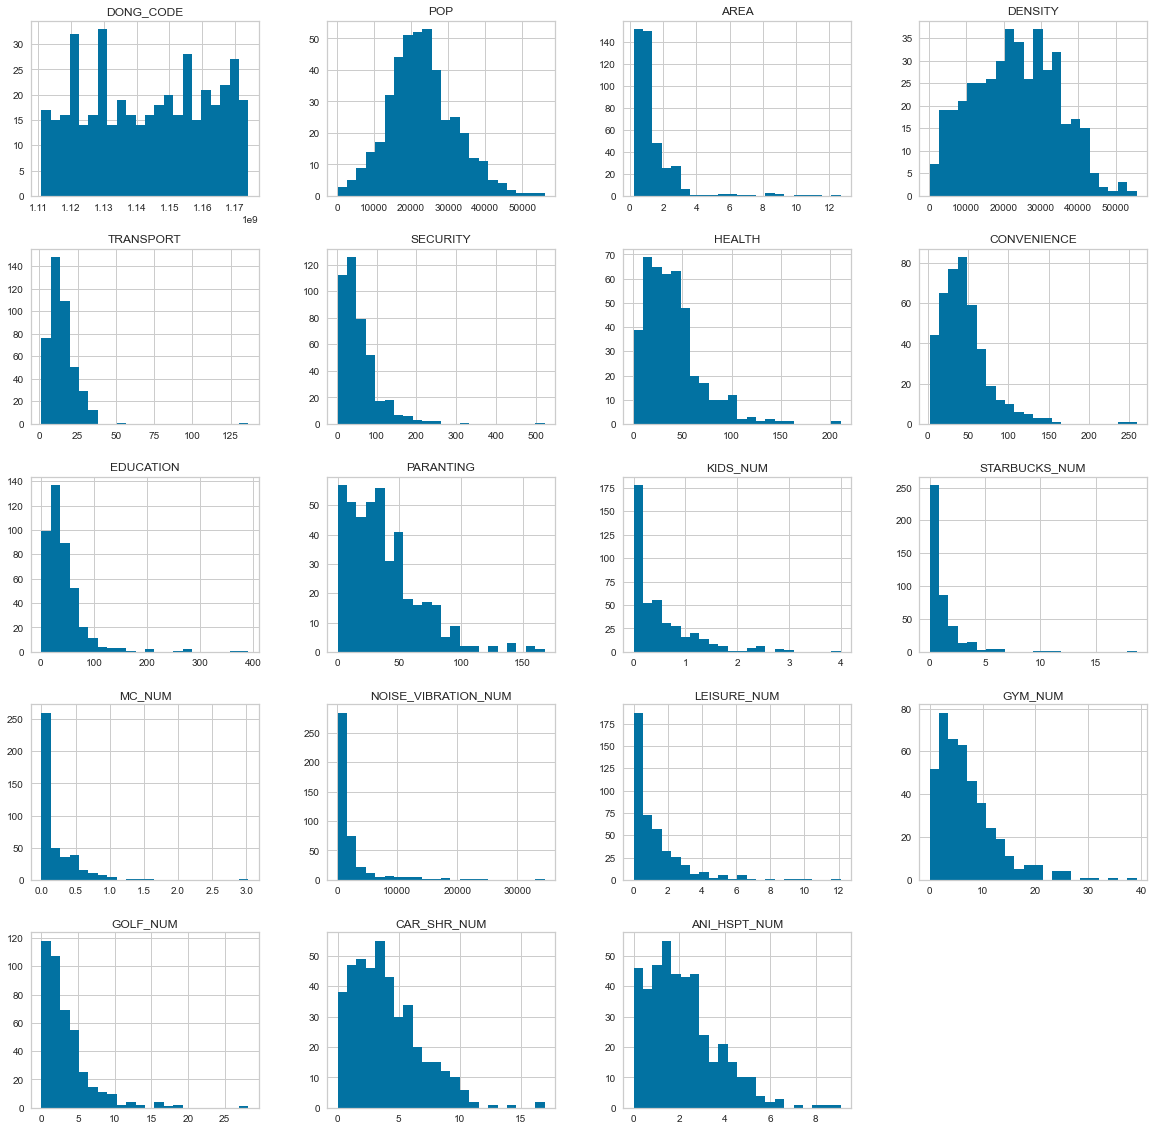

In [27]:
tmp_df.hist(figsize = (20, 20), bins = 22, legend = False)

**교통**

In [59]:
transport = tmp_df['TRANSPORT']

In [60]:
transport.describe()

count    426.000000
mean      14.899219
std        9.722790
min        1.402529
25%        9.331860
50%       13.183811
75%       18.691749
max      136.688552
Name: TRANSPORT, dtype: float64

In [61]:
for i in range(len(transport)):
    if (transport[i]<4):
        transport[i] = 6
    elif (transport[i]>=4 and transport[i]<8):
        transport[i] = 5
    elif (transport[i]>=8 and transport[i]<12):
        transport[i] = 4
    elif (transport[i]>=12 and transport[i]<16):
        transport[i] = 3
    elif (transport[i]>=16 and transport[i]<20):
        transport[i] = 2
    else:
        transport[i] = 1
transport

0      5.0
1      3.0
2      5.0
3      6.0
4      6.0
      ... 
421    2.0
422    3.0
423    3.0
424    5.0
425    2.0
Name: TRANSPORT, Length: 426, dtype: float64

In [62]:
transport.value_counts()

4.0    98
1.0    91
3.0    90
5.0    66
2.0    64
6.0    17
Name: TRANSPORT, dtype: int64

In [63]:
tmp_df['TRANSPORT'] = transport
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.0,23.216602,4.368353,9.891051,5.692607,2.853437,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,3.0,36.314363,57.907859,60.455285,12.276423,16.531165,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,5.0,15.436242,4.496644,20.187919,1.006711,7.382550,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,6.0,18.942731,1.682819,10.660793,9.030837,2.202643,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,6.0,2.480271,1.517475,2.868095,2.213078,1.127396,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.0,79.601990,84.378109,96.129353,67.995025,30.845771,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,3.0,75.117371,79.624413,90.713615,64.164319,29.107981,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,3.0,55.299539,52.949309,50.700461,34.778802,13.824885,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,5.0,36.413043,15.467391,28.750000,31.016304,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435


**보안**

In [64]:
security = tmp_df['SECURITY']
security

0      23.216602
1      36.314363
2      15.436242
3      18.942731
4       2.480271
         ...    
421    79.601990
422    75.117371
423    55.299539
424    36.413043
425    34.183673
Name: SECURITY, Length: 426, dtype: float64

In [65]:
security.describe()

count    426.000000
mean      56.413573
std       50.615331
min        1.104101
25%       23.515357
50%       43.993671
75%       73.260354
max      522.500000
Name: SECURITY, dtype: float64

In [66]:
for i in range(len(security)):
    if (security[i]<25):
        security[i] = 5
    elif (security[i]>=25 and security[i]<50):
        security[i] = 4
    elif (security[i]>=50 and security[i]<75):
        security[i] = 3
    elif (security[i]>=75 and security[i]<100):
        security[i] = 2
    else:
        security[i] = 1
security.value_counts()

4.0    131
5.0    113
3.0     78
1.0     56
2.0     48
Name: SECURITY, dtype: int64

In [68]:
tmp_df['SECURITY'] = security
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.0,5.0,4.368353,9.891051,5.692607,2.853437,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,3.0,4.0,57.907859,60.455285,12.276423,16.531165,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,5.0,5.0,4.496644,20.187919,1.006711,7.382550,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,6.0,5.0,1.682819,10.660793,9.030837,2.202643,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,6.0,5.0,1.517475,2.868095,2.213078,1.127396,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.0,2.0,84.378109,96.129353,67.995025,30.845771,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,3.0,2.0,79.624413,90.713615,64.164319,29.107981,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,3.0,3.0,52.949309,50.700461,34.778802,13.824885,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,5.0,4.0,15.467391,28.750000,31.016304,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435


**소음**

In [69]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

0       7321.400778
1      18575.609756
2       9471.140940
3       2664.317181
4        454.565953
           ...     
421     2152.736318
422     2031.455399
423     1994.009217
424     2351.630435
425     2207.653061
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [70]:
for i in range(len(noise)):
    if (noise[i]<400):
        noise[i] = 6
    elif (noise[i]>=400 and noise[i]<800):
        noise[i] = 5
    elif (noise[i]>=800 and noise[i]<1200):
        noise[i] = 4
    elif (noise[i]>=1200 and noise[i]<1600):
        noise[i] = 3
    elif (noise[i]>=1600 and noise[i]<3200):
        noise[i] = 2
    else:
        noise[i] = 1
noise

0      1.0
1      1.0
2      1.0
3      2.0
4      5.0
      ... 
421    2.0
422    2.0
423    2.0
424    2.0
425    2.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [71]:
noise.value_counts()

6.0    102
5.0     82
2.0     72
1.0     68
4.0     61
3.0     41
Name: NOISE_VIBRATION_NUM, dtype: int64

In [72]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.0,5.0,4.368353,9.891051,5.692607,2.853437,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,3.0,4.0,57.907859,60.455285,12.276423,16.531165,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,5.0,5.0,4.496644,20.187919,1.006711,7.382550,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,6.0,5.0,1.682819,10.660793,9.030837,2.202643,0.000000,0.000000,0.000000,2.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,6.0,5.0,1.517475,2.868095,2.213078,1.127396,0.000000,0.112740,0.000000,5.0,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.0,2.0,84.378109,96.129353,67.995025,30.845771,0.995025,1.990050,0.000000,2.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,3.0,2.0,79.624413,90.713615,64.164319,29.107981,0.938967,1.877934,0.000000,2.0,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,3.0,3.0,52.949309,50.700461,34.778802,13.824885,0.460829,0.921659,0.000000,2.0,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,5.0,4.0,15.467391,28.750000,31.016304,0.000000,0.000000,0.000000,0.543478,2.0,0.000000,4.347826,3.260870,2.173913,1.630435


array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'POP'}>,
        <AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'DENSITY'}>],
       [<AxesSubplot:title={'center':'TRANSPORT'}>,
        <AxesSubplot:title={'center':'SECURITY'}>,
        <AxesSubplot:title={'center':'HEALTH'}>,
        <AxesSubplot:title={'center':'CONVENIENCE'}>],
       [<AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PARANTING'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>],
       [<AxesSubplot:title={'center':'MC_NUM'}>,
        <AxesSubplot:title={'center':'NOISE_VIBRATION_NUM'}>,
        <AxesSubplot:title={'center':'LEISURE_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>],
       [<AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSubplot:title={'center':'CAR_SHR_NUM'}>,
        <AxesSubplot:title={'center':'ANI_HSPT_NUM'}>, <AxesSubp

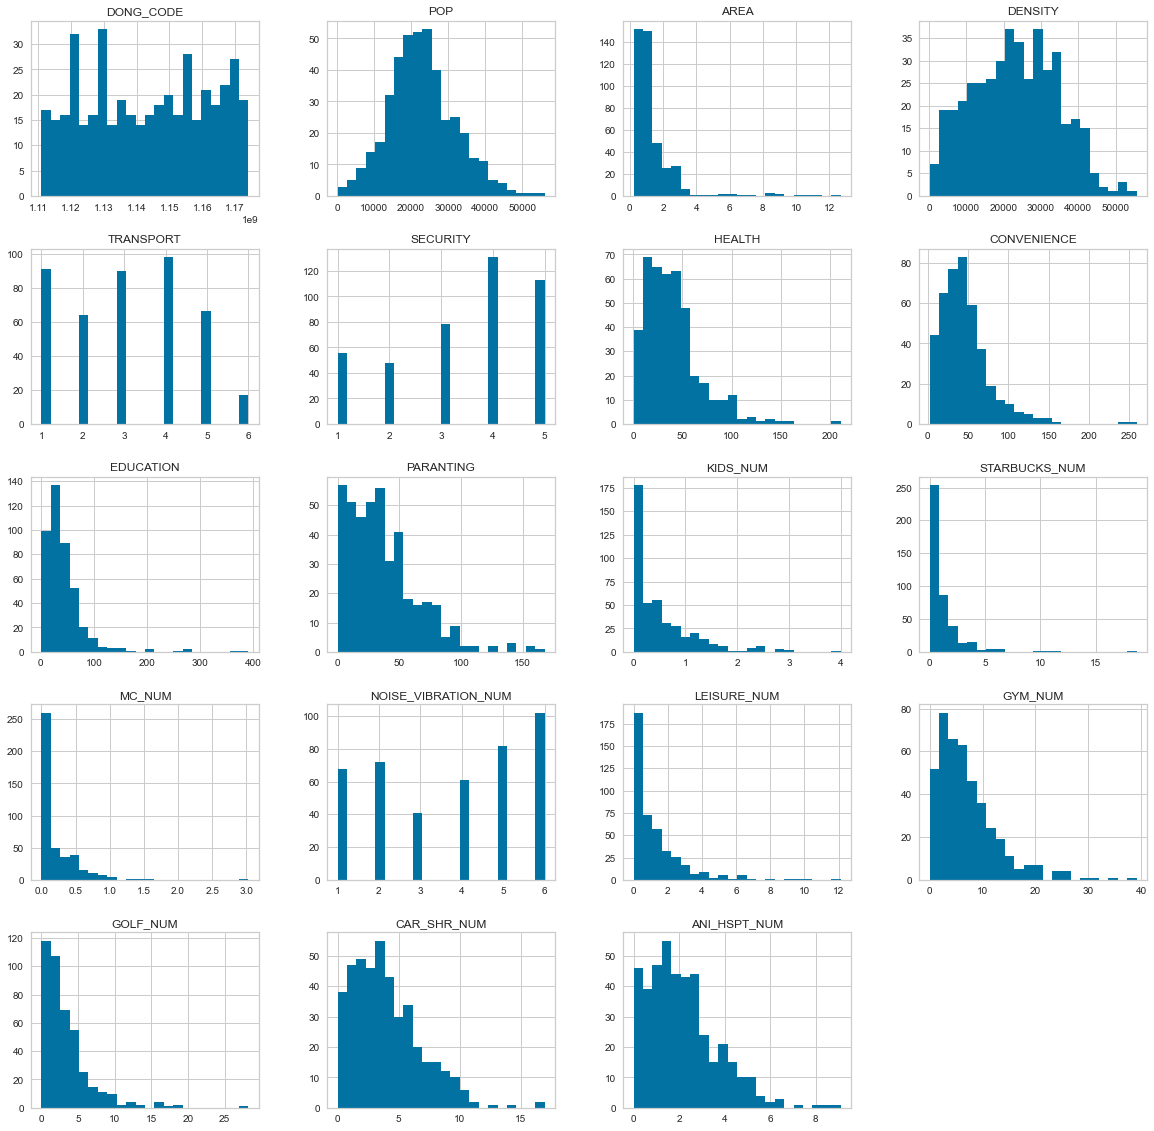

In [117]:
tmp_df.hist(figsize = (20, 20), bins = 22, legend = False)

**MinMaxScaling**

In [73]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.0,5.0,4.368353,9.891051,5.692607,2.853437,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,3.0,4.0,57.907859,60.455285,12.276423,16.531165,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,5.0,5.0,4.496644,20.187919,1.006711,7.382550,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,6.0,5.0,1.682819,10.660793,9.030837,2.202643,0.000000,0.000000,0.000000,2.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,6.0,5.0,1.517475,2.868095,2.213078,1.127396,0.000000,0.112740,0.000000,5.0,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.0,2.0,84.378109,96.129353,67.995025,30.845771,0.995025,1.990050,0.000000,2.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,3.0,2.0,79.624413,90.713615,64.164319,29.107981,0.938967,1.877934,0.000000,2.0,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,3.0,3.0,52.949309,50.700461,34.778802,13.824885,0.460829,0.921659,0.000000,2.0,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,5.0,4.0,15.467391,28.750000,31.016304,0.000000,0.000000,0.000000,0.543478,2.0,0.000000,4.347826,3.260870,2.173913,1.630435


In [74]:
col = df.columns[6:]
data = df[col]

In [75]:
scaler = MinMaxScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[0.8       , 1.        , 0.01903878, ..., 0.        , 0.02294722,
        0.08560311],
       [0.4       , 0.75      , 0.27315828, ..., 0.08630394, 0.23973317,
        0.08943089],
       [0.8       , 1.        , 0.0196477 , ..., 0.        , 0.03958011,
        0.        ],
       ...,
       [0.4       , 0.5       , 0.24962305, ..., 0.14675647, 0.27177124,
        0.40552995],
       [0.8       , 0.75      , 0.07171917, ..., 0.11538462, 0.12820513,
        0.17934783],
       [0.2       , 0.75      , 0.06722441, ..., 0.10832025, 0.12035583,
        0.16836735]])

In [76]:
df[col] = df_scaled
data = df[col]

## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [77]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

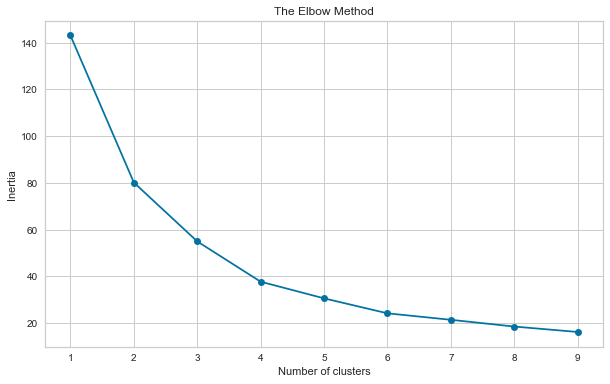

In [78]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [79]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [80]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
1,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
2,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121


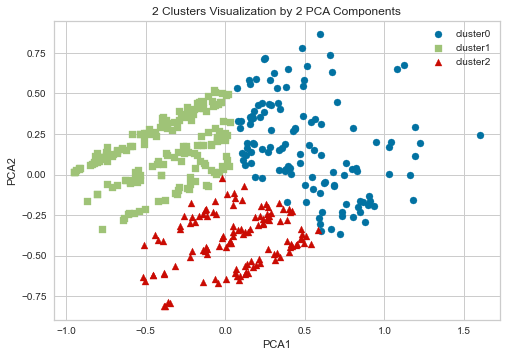

In [81]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

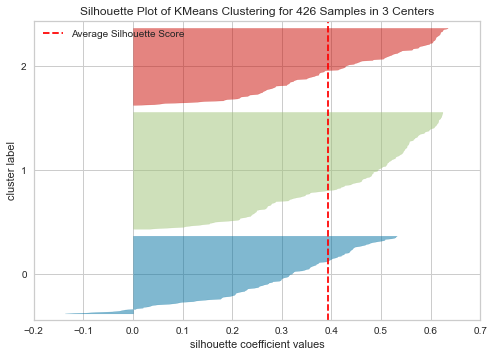

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [82]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()
# sil_avg = silhouette_score(data,kmeans.fit(pca_transformed))
# print(sil_avg)

In [83]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.220


#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [84]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [85]:
df_cluster_0.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2.147541,2.065574,66.961288,76.907739,65.153868,58.628261,0.897786,2.120065,0.282503,3.303279,2.094353,11.982324,5.611168,6.695501,3.463402
std,1.302713,1.111456,29.982501,36.374419,62.124656,31.252286,0.796586,2.502734,0.395037,1.650892,2.141955,6.847481,4.726706,2.948385,1.561575
min,1.000000,1.000000,19.009524,34.352381,1.166667,4.411765,0.000000,0.000000,0.000000,1.000000,0.000000,1.351351,0.000000,0.476190,0.000000
25%,1.000000,1.000000,47.111562,52.980044,36.650940,34.823826,0.334175,0.623219,0.000000,2.000000,0.629630,6.974638,2.524587,4.369213,2.446984
50%,2.000000,2.000000,59.670833,66.926215,50.192982,55.910364,0.787450,1.392479,0.196078,3.500000,1.607734,10.833131,4.145189,6.756834,3.339173
75%,3.000000,3.000000,83.392556,88.514237,69.871544,78.862339,1.310118,2.607563,0.433846,5.000000,2.807018,15.473790,7.864510,8.605072,4.360766
max,6.000000,5.000000,211.043478,258.965217,390.982877,167.705167,4.000000,18.686869,3.030303,6.000000,12.121212,39.130435,28.260870,16.956522,9.090909


**km_cluster == 1**

In [86]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [87]:
df_cluster_1.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,3.715847,4.191257,27.632543,30.814740,33.530383,27.837991,0.416499,0.576434,0.138315,5.311475,0.984431,5.112963,2.344080,2.671220,1.565315
std,1.373261,0.920780,15.556808,16.437435,27.726168,17.645136,0.444014,0.519379,0.185284,0.767635,1.160004,3.353978,1.678937,1.476307,0.954517
min,1.000000,1.000000,1.348580,2.296530,1.525229,1.011673,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,14.305048,17.204741,15.511742,14.482740,0.068899,0.196984,0.000000,5.000000,0.185205,2.471338,1.114661,1.469318,0.815861
50%,4.000000,4.000000,27.382716,29.475524,26.139896,25.873016,0.328407,0.439560,0.061275,5.000000,0.688705,4.356436,1.899593,2.564103,1.424501
75%,5.000000,5.000000,38.702378,42.287917,41.697181,39.286869,0.559917,0.813062,0.218586,6.000000,1.388889,7.271409,3.233274,3.610226,2.274085
max,6.000000,5.000000,95.741667,72.941748,151.726190,91.935484,2.500000,2.303754,0.980392,6.000000,6.567164,17.500000,7.650739,6.190476,4.166667


**km_cluster == 2**

In [88]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [89]:
df_cluster_2.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,3.066116,3.768595,32.236292,38.956230,33.062635,29.036288,0.219700,1.072742,0.168866,1.867769,0.706226,5.312694,2.573505,3.475853,1.720546
std,1.327501,0.972628,23.128243,20.573415,24.082291,28.018973,0.477612,1.564528,0.328671,0.763131,1.346388,4.676850,2.451705,2.396509,1.463143
min,1.000000,1.000000,0.357143,5.500000,1.006711,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,16.343750,22.940000,15.083333,8.464567,0.000000,0.000000,0.000000,1.000000,0.000000,2.234637,0.500000,1.530612,0.778210
50%,3.000000,4.000000,27.624242,35.956989,28.692913,20.299145,0.000000,0.606061,0.000000,2.000000,0.000000,4.182510,2.061856,3.333333,1.412429
75%,4.000000,4.000000,45.454545,50.700461,43.888889,42.187500,0.165563,1.449275,0.165563,2.000000,1.030928,6.722689,3.676471,5.263158,2.350427
max,6.000000,5.000000,134.900000,122.812500,126.561856,143.137255,2.857143,11.428571,1.449275,4.000000,10.344828,29.245283,11.764706,10.714286,8.490566


### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [90]:
df_0 = df[df['km_cluster'] == 0]
df_0 = df_0.drop('km_cluster',axis=1)
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
15,종로구,숭인1동,1111070000,6106,0.23,26548,1.0,2.0,58.130435,63.782609,24.347826,67.391304,0.000000,2.173913,0.000000,1.0,6.521739,10.869565,4.347826,8.695652,4.347826,0.862754,-0.166719
17,중구,소공동,1114052000,3367,0.95,3544,1.0,2.0,63.778947,115.484211,8.310526,32.105263,0.000000,9.473684,0.000000,1.0,0.000000,6.842105,3.157895,8.947368,0.000000,0.723069,-0.365388
18,중구,회현동,1114054000,5432,0.84,6467,1.0,1.0,73.321429,120.761905,1.267857,45.833333,0.000000,11.309524,0.000000,1.0,0.000000,5.952381,0.000000,8.928571,0.000000,0.879540,-0.292938
19,중구,명동,1114055000,3742,0.99,3780,1.0,1.0,144.606061,238.808081,14.964646,44.444444,0.000000,18.686869,3.030303,1.0,1.010101,18.181818,3.030303,7.070707,0.000000,1.182218,-0.155055
22,중구,광희동,1114059000,6340,0.74,8568,1.0,1.0,47.500000,149.283784,3.405405,26.351351,1.351351,4.729730,0.000000,1.0,6.756757,1.351351,2.702703,7.432432,0.675676,0.899046,-0.190067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,3.0,1.0,88.375587,97.276995,43.431925,38.497653,2.816901,1.877934,0.469484,2.0,6.103286,6.572770,3.286385,7.981221,1.877934,0.761140,0.074074
419,강동구,천호3동,1174062000,27000,0.79,34177,5.0,1.0,79.426160,87.426160,39.033755,34.599156,2.531646,1.687764,0.421941,2.0,5.485232,5.907173,2.953586,7.172996,1.687764,0.543872,-0.014753
420,강동구,성내1동,1174064000,20045,0.58,34560,4.0,2.0,97.471264,111.045977,78.545977,35.632184,1.149425,2.298851,0.000000,2.0,2.873563,17.241379,8.045977,11.494253,4.597701,0.678232,0.016209
421,강동구,성내2동,1174065000,24106,0.67,35979,2.0,2.0,84.378109,96.129353,67.995025,30.845771,0.995025,1.990050,0.000000,2.0,2.487562,14.925373,6.965174,9.950249,3.980100,0.742663,-0.003425


In [91]:
col_0 = df_0.columns[6:-2]
data_0 = df_0[col_0].values

In [92]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
15,종로구,숭인1동,1111070000,6106,0.23,26548,1.0,2.0,58.130435,63.782609,24.347826,67.391304,0.000000,2.173913,0.000000,1.0,6.521739,10.869565,4.347826,8.695652,4.347826,-42.965578,-2.560569
17,중구,소공동,1114052000,3367,0.95,3544,1.0,2.0,63.778947,115.484211,8.310526,32.105263,0.000000,9.473684,0.000000,1.0,0.000000,6.842105,3.157895,8.947368,0.000000,-48.336375,47.740668
18,중구,회현동,1114054000,5432,0.84,6467,1.0,1.0,73.321429,120.761905,1.267857,45.833333,0.000000,11.309524,0.000000,1.0,0.000000,5.952381,0.000000,8.928571,0.000000,-51.047425,58.238596
19,중구,명동,1114055000,3742,0.99,3780,1.0,1.0,144.606061,238.808081,14.964646,44.444444,0.000000,18.686869,3.030303,1.0,1.010101,18.181818,3.030303,7.070707,0.000000,4.219724,185.367335
22,중구,광희동,1114059000,6340,0.74,8568,1.0,1.0,47.500000,149.283784,3.405405,26.351351,1.351351,4.729730,0.000000,1.0,6.756757,1.351351,2.702703,7.432432,0.675676,-51.434562,67.392204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,강동구,천호1동,1174060000,26973,0.71,37990,3.0,1.0,88.375587,97.276995,43.431925,38.497653,2.816901,1.877934,0.469484,2.0,6.103286,6.572770,3.286385,7.981221,1.877934,-12.102432,34.350510
419,강동구,천호3동,1174062000,27000,0.79,34177,5.0,1.0,79.426160,87.426160,39.033755,34.599156,2.531646,1.687764,0.421941,2.0,5.485232,5.907173,2.953586,7.172996,1.687764,-20.723334,23.411850
420,강동구,성내1동,1174064000,20045,0.58,34560,4.0,2.0,97.471264,111.045977,78.545977,35.632184,1.149425,2.298851,0.000000,2.0,2.873563,17.241379,8.045977,11.494253,4.597701,26.826327,40.270041
421,강동구,성내2동,1174065000,24106,0.67,35979,2.0,2.0,84.378109,96.129353,67.995025,30.845771,0.995025,1.990050,0.000000,2.0,2.487562,14.925373,6.965174,9.950249,3.980100,10.144854,24.955654


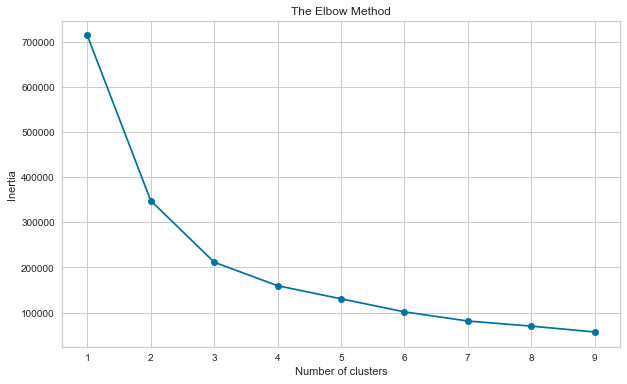

In [93]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [94]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [95]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,
0,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31


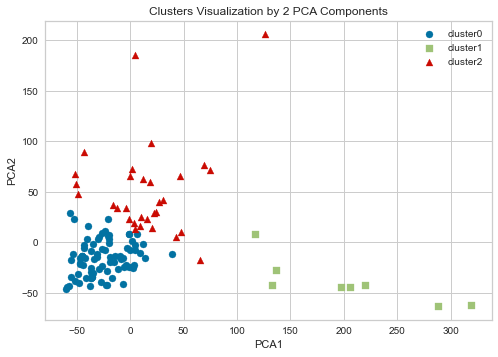

In [96]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

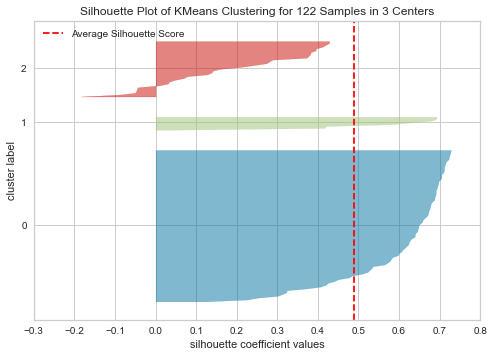

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 122 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [97]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [98]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.381


In [128]:
df_0[df_0['pca_x'] > 150]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
365,강남구,대치1동,1168060000,24199,0.79,30632,11.530,92.25,1.0,1.0,285.4175,22.75,0.25,4.00,0.25,2.0,0.25,14.50,13.00,5.0,2.0,185.400848,-80.326481,1
366,강남구,대치2동,1168061000,36663,2.00,18332,18.040,92.25,1.0,1.0,285.4175,22.75,0.25,4.00,0.25,2.0,0.25,14.50,13.00,5.0,2.0,185.225550,-80.603427,1
367,강남구,대치4동,1168063000,20079,0.73,27505,8.740,92.25,1.0,1.0,285.4175,22.75,0.25,4.00,0.25,2.0,0.25,14.50,13.00,5.0,2.0,185.475975,-80.207790,1
378,강남구,일원2동,1168074000,17585,1.24,14181,9.305,200.25,1.0,1.0,342.2800,42.00,0.50,4.25,0.25,1.0,0.50,19.25,19.75,8.5,5.0,285.676464,-23.816417,1


In [99]:
df_1 = df[df['km_cluster'] == 1]
df_1 = df_1.drop('km_cluster',axis=1)
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
4,종로구,평창동,1111056000,18329,8.87,2066,6.0,5.0,1.517475,2.868095,2.213078,1.127396,0.000000,0.112740,0.000000,5.0,0.000000,0.563698,0.563698,0.000000,0.000000,-0.868895,-0.165639
25,중구,다산동,1114062500,14274,0.51,27988,5.0,1.0,41.006536,54.849673,25.196078,47.385621,0.326797,0.326797,0.000000,6.0,0.000000,6.535948,0.653595,4.248366,2.941176,-0.021359,0.500229
41,용산구,이촌1동,1117063000,26632,2.86,9312,6.0,5.0,7.531469,4.052448,5.716783,8.566434,0.000000,0.349650,0.000000,6.0,0.000000,1.048951,0.699301,0.174825,0.699301,-0.922275,0.036205
42,용산구,이촌2동,1117064000,8374,1.22,6864,5.0,5.0,17.655738,9.500000,13.401639,20.081967,0.000000,0.819672,0.000000,5.0,0.000000,2.459016,1.639344,0.409836,1.639344,-0.681958,-0.066783
44,용산구,이태원2동,1117066000,10604,0.86,12330,4.0,4.0,12.709302,32.953488,6.180233,14.534884,0.000000,1.162791,0.000000,4.0,0.581395,5.232558,0.581395,3.488372,1.744186,-0.302053,-0.118867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,송파구,잠실7동,1171072000,9564,0.60,15940,5.0,5.0,95.741667,44.941667,87.083333,15.000000,1.250000,1.250000,0.833333,4.0,5.833333,17.500000,6.250000,4.583333,4.166667,-0.159071,0.085520
408,강동구,상일1동,1174052500,38929,2.65,14690,5.0,5.0,5.090566,10.011321,6.300000,28.301887,0.000000,0.188679,0.188679,4.0,0.000000,0.943396,1.132075,0.377358,0.377358,-0.633857,-0.266351
413,강동구,고덕2동,1174056000,22329,2.01,11109,5.0,5.0,11.184080,13.144279,21.019900,21.641791,0.248756,0.248756,0.000000,4.0,0.000000,1.492537,0.248756,0.497512,0.995025,-0.610176,-0.245190
416,강동구,암사3동,1174059000,17947,2.51,7150,5.0,5.0,11.410359,13.784861,19.053121,5.444887,0.531208,0.132802,0.000000,5.0,0.132802,2.124834,1.062417,0.531208,0.664011,-0.713277,-0.079500


In [100]:
col_1 = df_1.columns[6:-2]
data_1 = df_1[col_1].values

In [101]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
4,종로구,평창동,1111056000,18329,8.87,2066,6.0,5.0,1.517475,2.868095,2.213078,1.127396,0.000000,0.112740,0.000000,5.0,0.000000,0.563698,0.563698,0.000000,0.000000,-54.141748,16.175110
25,중구,다산동,1114062500,14274,0.51,27988,5.0,1.0,41.006536,54.849673,25.196078,47.385621,0.326797,0.326797,0.000000,6.0,0.000000,6.535948,0.653595,4.248366,2.941176,14.364129,-31.451043
41,용산구,이촌1동,1117063000,26632,2.86,9312,6.0,5.0,7.531469,4.052448,5.716783,8.566434,0.000000,0.349650,0.000000,6.0,0.000000,1.048951,0.699301,0.174825,0.699301,-45.985589,12.200288
42,용산구,이촌2동,1117064000,8374,1.22,6864,5.0,5.0,17.655738,9.500000,13.401639,20.081967,0.000000,0.819672,0.000000,5.0,0.000000,2.459016,1.639344,0.409836,1.639344,-29.937216,5.345137
44,용산구,이태원2동,1117066000,10604,0.86,12330,4.0,4.0,12.709302,32.953488,6.180233,14.534884,0.000000,1.162791,0.000000,4.0,0.581395,5.232558,0.581395,3.488372,1.744186,-30.789438,-7.144584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,송파구,잠실7동,1171072000,9564,0.60,15940,5.0,5.0,95.741667,44.941667,87.083333,15.000000,1.250000,1.250000,0.833333,4.0,5.833333,17.500000,6.250000,4.583333,4.166667,69.395428,15.757727
408,강동구,상일1동,1174052500,38929,2.65,14690,5.0,5.0,5.090566,10.011321,6.300000,28.301887,0.000000,0.188679,0.188679,4.0,0.000000,0.943396,1.132075,0.377358,0.377358,-37.370506,-0.669793
413,강동구,고덕2동,1174056000,22329,2.01,11109,5.0,5.0,11.184080,13.144279,21.019900,21.641791,0.248756,0.248756,0.000000,4.0,0.000000,1.492537,0.248756,0.497512,0.995025,-24.934508,8.925622
416,강동구,암사3동,1174059000,17947,2.51,7150,5.0,5.0,11.410359,13.784861,19.053121,5.444887,0.531208,0.132802,0.000000,5.0,0.132802,2.124834,1.062417,0.531208,0.664011,-31.792847,16.134219


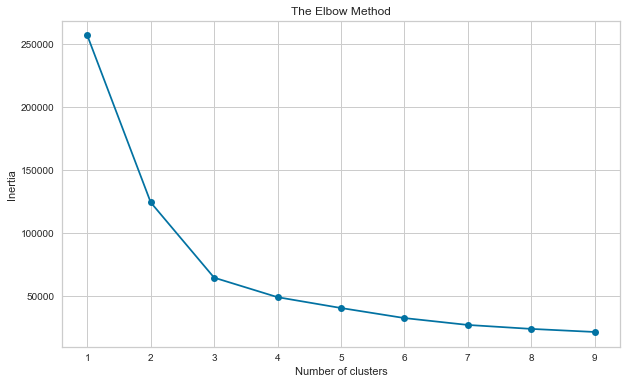

In [102]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [103]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [104]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,
0,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
1,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
2,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15


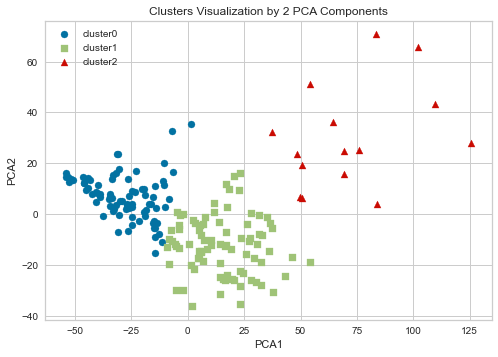

In [105]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

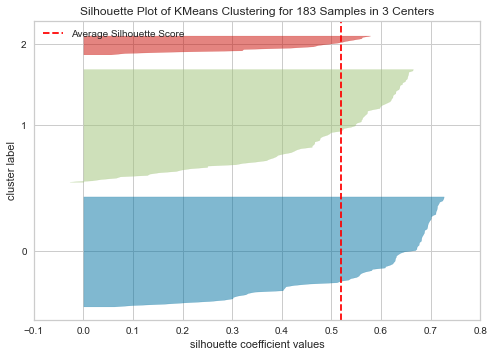

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 183 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [106]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [107]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.426


In [108]:
df_2 = df[df['km_cluster'] == 2]
df_2 = df_2.drop('km_cluster',axis=1)
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.0,5.0,4.368353,9.891051,5.692607,2.853437,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,-0.384733,-0.809577
1,종로구,사직동,1111053000,9636,1.23,7834,3.0,4.0,57.907859,60.455285,12.276423,16.531165,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008,0.191374,-0.558845
2,종로구,삼청동,1111054000,2739,1.49,1838,5.0,5.0,4.496644,20.187919,1.006711,7.382550,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,-0.377982,-0.812630
3,종로구,부암동,1111055000,9782,2.27,4309,6.0,5.0,1.682819,10.660793,9.030837,2.202643,0.000000,0.000000,0.000000,2.0,0.000000,0.881057,0.881057,2.202643,1.321586,-0.514929,-0.634971
5,종로구,무악동,1111057000,8297,0.36,23047,3.0,4.0,13.888889,20.555556,43.888889,36.111111,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.777778,2.777778,0.000000,0.001738,-0.642273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,강동구,암사1동,1174057000,34782,1.02,34100,5.0,4.0,28.078431,33.921569,46.885621,13.398693,1.307190,0.326797,0.000000,3.0,0.326797,5.228758,2.614379,1.307190,1.633987,-0.262514,-0.258117
415,강동구,암사2동,1174058000,15252,1.18,12925,4.0,4.0,24.271186,29.322034,40.528249,11.581921,1.129944,0.282486,0.000000,3.0,0.282486,4.519774,2.259887,1.129944,1.412429,-0.211909,-0.259825
423,강동구,길동,1174068500,45973,2.17,21186,3.0,3.0,52.949309,50.700461,34.778802,13.824885,0.460829,0.921659,0.000000,2.0,1.382488,8.294931,4.147465,4.608295,3.686636,0.271590,-0.254718
424,강동구,둔촌1동,1174069000,144,0.92,157,5.0,4.0,15.467391,28.750000,31.016304,0.000000,0.000000,0.000000,0.543478,2.0,0.000000,4.347826,3.260870,2.173913,1.630435,-0.224420,-0.507551


In [109]:
col_2 = df_2.columns[6:-2]
data_2 = df_2[col_2].values

In [110]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.0,5.0,4.368353,9.891051,5.692607,2.853437,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,-54.274406,6.676230
1,종로구,사직동,1111053000,9636,1.23,7834,3.0,4.0,57.907859,60.455285,12.276423,16.531165,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008,3.943796,-19.166119
2,종로구,삼청동,1111054000,2739,1.49,1838,5.0,5.0,4.496644,20.187919,1.006711,7.382550,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,-50.510244,8.683456
3,종로구,부암동,1111055000,9782,2.27,4309,6.0,5.0,1.682819,10.660793,9.030837,2.202643,0.000000,0.000000,0.000000,2.0,0.000000,0.881057,0.881057,2.202643,1.321586,-54.011549,5.538254
5,종로구,무악동,1111057000,8297,0.36,23047,3.0,4.0,13.888889,20.555556,43.888889,36.111111,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.777778,2.777778,0.000000,-6.869393,14.343251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,강동구,암사1동,1174057000,34782,1.02,34100,5.0,4.0,28.078431,33.921569,46.885621,13.398693,1.307190,0.326797,0.000000,3.0,0.326797,5.228758,2.614379,1.307190,1.633987,-5.772199,-14.502780
415,강동구,암사2동,1174058000,15252,1.18,12925,4.0,4.0,24.271186,29.322034,40.528249,11.581921,1.129944,0.282486,0.000000,3.0,0.282486,4.519774,2.259887,1.129944,1.412429,-13.714535,-11.072316
423,강동구,길동,1174068500,45973,2.17,21186,3.0,3.0,52.949309,50.700461,34.778802,13.824885,0.460829,0.921659,0.000000,2.0,1.382488,8.294931,4.147465,4.608295,3.686636,7.666798,-23.947244
424,강동구,둔촌1동,1174069000,144,0.92,157,5.0,4.0,15.467391,28.750000,31.016304,0.000000,0.000000,0.000000,0.543478,2.0,0.000000,4.347826,3.260870,2.173913,1.630435,-30.153380,-14.198290


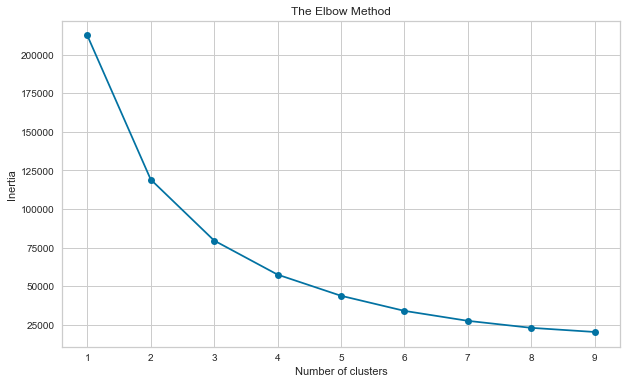

In [111]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [112]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [113]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,
0,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
3,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


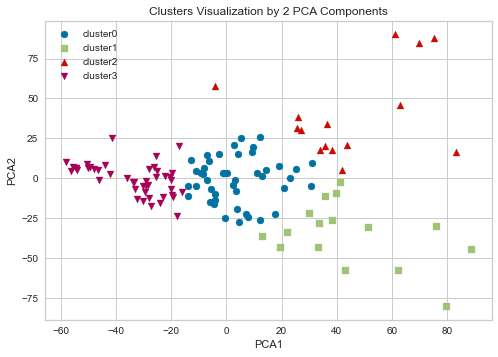

In [114]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

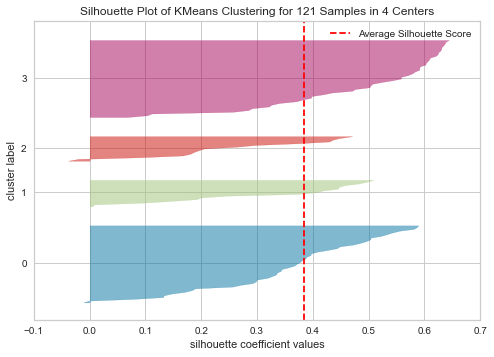

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 121 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [115]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [116]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.240


In [127]:
df_2[df_2['pca_x'] > 150]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
266,구로구,가리봉동,1153059500,13091,0.4,32728,3.78,209.0,5.0,4.0,3.9,11.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,157.867059,-27.589033,2


In [135]:
df_2[df_2['pca_x'] > 50]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
20,중구,필동,1114057000,4679,1.14,4104,6.640000,101.0,4.0,1.0,7.6150,13.500000,0.00,2.500000,0.0,1.0,1.000000,2.500000,1.00,4.5,2.000000,50.938541,-20.388556,1
110,성북구,성북동,1129052500,17026,2.86,5953,21.240000,139.0,3.0,3.0,36.4400,3.000000,0.00,1.000000,1.0,1.0,0.000000,6.000000,1.00,1.0,2.000000,92.112998,-12.823211,1
125,성북구,월곡2동,1129072500,19896,1.36,14629,16.453333,119.0,4.0,3.0,35.3700,22.666667,1.00,0.666667,0.0,2.0,2.666667,4.333333,5.00,4.0,1.666667,71.434242,2.866491,1
129,성북구,석관동,1129081000,35829,1.73,20710,16.300000,156.0,3.0,3.0,36.6000,53.000000,2.00,0.000000,0.0,2.0,1.000000,6.000000,2.00,3.0,2.000000,107.213325,28.110410,1
266,구로구,가리봉동,1153059500,13091,0.40,32728,3.780000,209.0,5.0,4.0,3.9000,11.000000,0.00,0.000000,0.0,2.0,1.000000,1.000000,0.00,2.0,0.000000,157.867059,-27.589033,1
274,구로구,수궁동,1153079000,23806,2.67,8916,28.280000,135.0,5.0,2.0,23.0500,17.000000,1.00,0.000000,0.0,1.0,0.000000,2.000000,1.00,3.0,1.000000,86.270324,-6.858941,1
373,강남구,개포2동,1168067000,27945,2.51,11133,20.095000,108.0,3.0,3.0,56.8625,19.250000,0.25,0.250000,0.0,1.0,0.250000,4.750000,6.75,3.5,3.000000,62.880734,11.979856,1
